In [31]:
##Importing all necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.stem import WordNetLemmatizer
import string
from nltk.corpus import  stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

# Data Collection

In [2]:
#Importing train data
train = pd.read_csv(r"C:\Users\jjjib\Desktop\Projects\FlipRobo\Malignant-Comments-Classifier -19-05\Malignant Comments Classifier Project\train.csv")

In [3]:
#Importing test data
test = pd.read_csv(r"C:\Users\jjjib\Desktop\Projects\FlipRobo\Malignant-Comments-Classifier -19-05\Malignant Comments Classifier Project\test.csv")

# Data Understanding

In [4]:
#Visualizing the train dataset 
train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
#Visualizing the test dataset 
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [7]:
train.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
# checking null values
train.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

<AxesSubplot:>

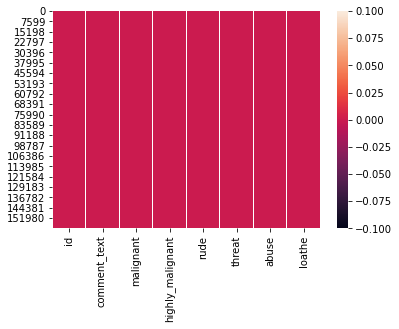

In [9]:
#Visualization of null data
sns.heatmap(train.isnull())

In [10]:
# checking correlation in dataset
train.corr()

,malignant,highly_malignant,rude,threat,abuse,loathe
malignant,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009
highly_malignant,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600
rude,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128
abuse,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736
loathe,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000


<AxesSubplot:>

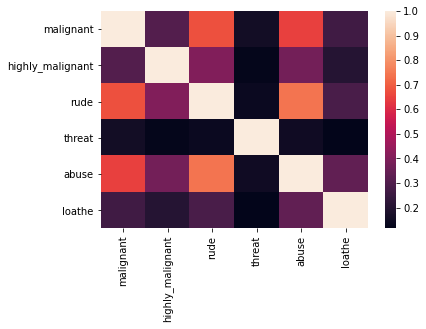

In [11]:
# Correlation visualization
sns.heatmap(train.corr())

In [12]:
# checking the skewness for the features:
train.skew()

malignant            2.745854
highly_malignant     9.851722
rude                 3.992817
threat              18.189001
abuse                4.160540
loathe              10.515923
dtype: float64

malignant


0    144277
1     15294
Name: malignant, dtype: int64


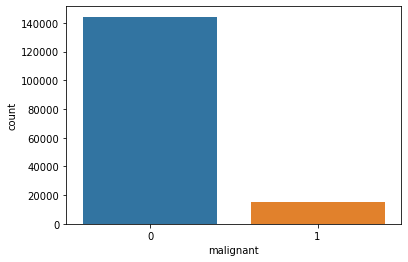

highly_malignant


0    157976
1      1595
Name: highly_malignant, dtype: int64


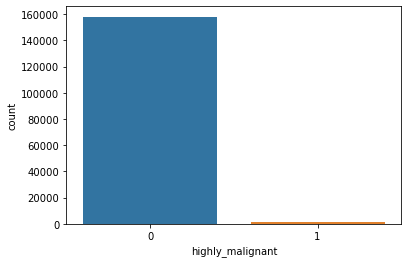

loathe


0    158166
1      1405
Name: loathe, dtype: int64


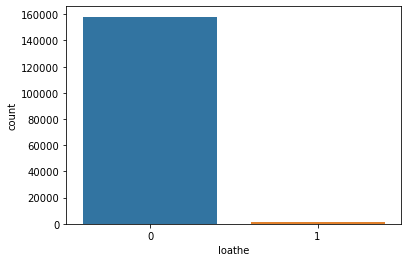

rude


0    151122
1      8449
Name: rude, dtype: int64


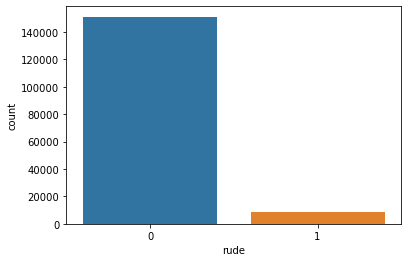

abuse


0    151694
1      7877
Name: abuse, dtype: int64


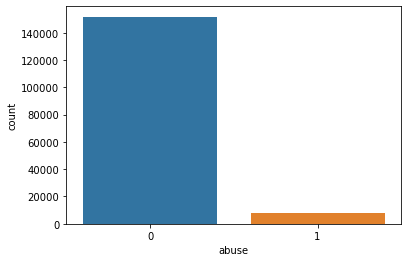

threat


0    159093
1       478
Name: threat, dtype: int64


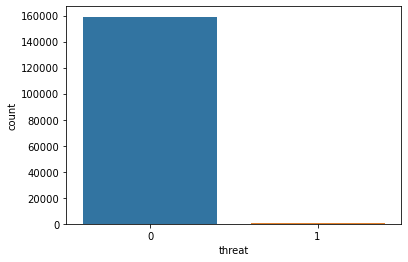

In [13]:
col=['malignant','highly_malignant','loathe','rude','abuse','threat']
for i in col:
    print(i)
    print("\n")
    print(train[i].value_counts())
    sns.countplot(train[i])
    plt.show()

# Data Cleaning and Analysis

In [14]:
# We will break down the comment text into words and characters to look at the length
train['length'] = train['comment_text'].str.len()
train.head(2)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112


We shall follow the same step for the test data

In [15]:
test['length'] = test['comment_text'].str.len()
test.head(2)

,id,comment_text,length
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,367
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,50


Now we will clean the comment text to fitler out the stopwords and punctuation, email, websites and phone numbers

In [16]:
# Convert all messages to lower case
train['comment_text'] = train['comment_text'].str.lower()

# Replace email addresses with 'email'
train['comment_text'] = train['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

# Replace URLs with 'webaddress'
train['comment_text'] = train['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

# Replace money symbols with 'moneysymb' 
train['comment_text'] = train['comment_text'].str.replace(r'£|\$', 'dollars')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
train['comment_text'] = train['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

# Replace numbers with 'numbr'
train['comment_text'] = train['comment_text'].str.replace(r'\d+(\.\d+)?', 'numbr')


train['comment_text'] = train['comment_text'].apply(lambda x: ' '.join(term for term in x.split() if term not in string.punctuation))

# Defining stop words
stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

train['comment_text'] = train['comment_text'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

lem = WordNetLemmatizer()
train['comment_text'] = train['comment_text'].apply(lambda x: ' '.join(lem.lemmatize(t) for t in x.split()))

In [17]:
# Similarly for the test data

# Convert all messages to lower case
test['comment_text'] = test['comment_text'].str.lower()

# Replace email addresses with 'email'
test['comment_text'] = test['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

# Replace URLs with 'webaddress'
test['comment_text'] = test['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

# Replace money symbols with 'moneysymb' 
test['comment_text'] = test['comment_text'].str.replace(r'£|\$', 'dollars')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
test['comment_text'] = test['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

# Replace numbers with 'numbr'
test['comment_text'] = test['comment_text'].str.replace(r'\d+(\.\d+)?', 'numbr')


test['comment_text'] = test['comment_text'].apply(lambda x: ' '.join(term for term in x.split() if term not in string.punctuation))

# Defining stop words
stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

test['comment_text'] = test['comment_text'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

lem = WordNetLemmatizer()
test['comment_text'] = test['comment_text'].apply(lambda x: ' '.join(lem.lemmatize(t) for t in x.split()))

In [18]:
# Now we see the length of the text after filtering out the necessary stopwords and punctuations
train['clean_length'] = train.comment_text.str.len()
train.head()

# For test data 
test['clean_length'] = test.comment_text.str.len()

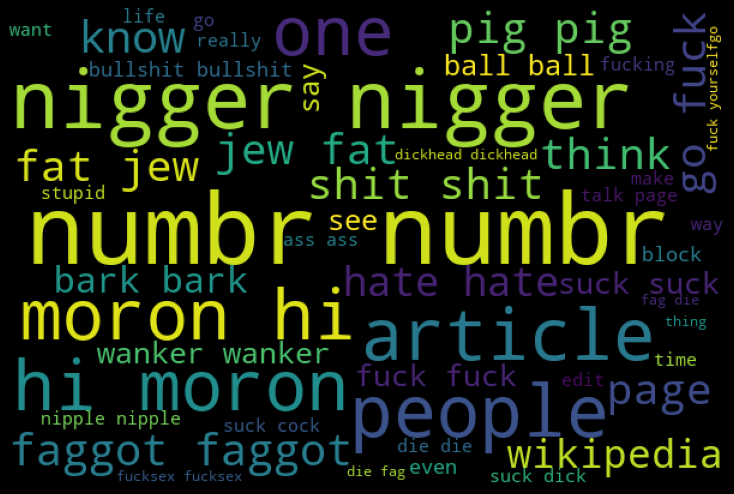

In [19]:
#Getting sense of loud words which are offensive
hams = train['comment_text'][train['malignant']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

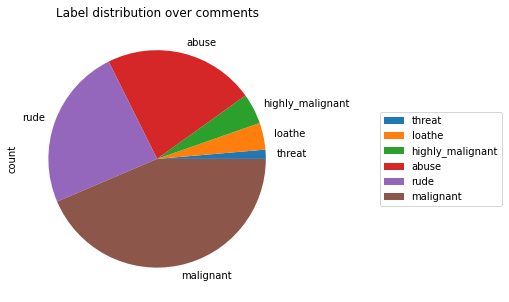

In [20]:
cols_target = ['malignant','highly_malignant','rude','threat','abuse','loathe']
df_distribution = train[cols_target].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

df_distribution.plot.pie(y='count',
                                      title='Label distribution over comments',
                                      figsize=(5, 5))\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

In [21]:
#Creating a combined target column
target_data = train[cols_target]

train['bad'] =train[cols_target].sum(axis =1)
print(train['bad'].value_counts())
train['bad'] = train['bad'] > 0 
train['bad'] = train['bad'].astype(int)
print(train['bad'].value_counts())

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: bad, dtype: int64
0    143346
1     16225
Name: bad, dtype: int64


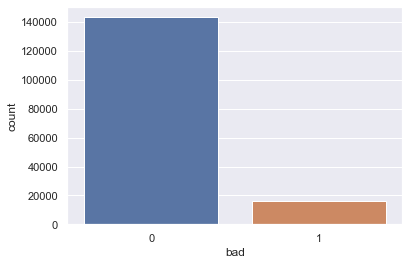

In [22]:
#Checking the imbalance
sns.set()
sns.countplot(x="bad" , data = train)
plt.show()

In [23]:
#  Convert text into vectors using TF-IDF
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
features = tf_vec.fit_transform(train['comment_text'])
x = features
y = train['bad']

In [24]:
# Test train split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=56,test_size=.30)

# Model

Logistic Regression

In [25]:
lg = LogisticRegression()
lg.fit(x_train, y_train)
y_pred_train = lg.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = lg.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9596057261031881
Test accuracy is 0.9553183489304813
[[42729   221]
 [ 1918  3004]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     42950
           1       0.93      0.61      0.74      4922

    accuracy                           0.96     47872
   macro avg       0.94      0.80      0.86     47872
weighted avg       0.95      0.96      0.95     47872



Decision Tree Classifier

In [26]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred_train = dt.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = dt.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9988988263099938
Test accuracy is 0.9392964572192514
[[41594  1356]
 [ 1550  3372]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     42950
           1       0.71      0.69      0.70      4922

    accuracy                           0.94     47872
   macro avg       0.84      0.83      0.83     47872
weighted avg       0.94      0.94      0.94     47872



Random Forest Classifier

In [27]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred_train = rf.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = rf.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9988540631518635
Test accuracy is 0.9556316844919787
[[42420   530]
 [ 1594  3328]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     42950
           1       0.86      0.68      0.76      4922

    accuracy                           0.96     47872
   macro avg       0.91      0.83      0.87     47872
weighted avg       0.95      0.96      0.95     47872



XGBoost

In [28]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
y_pred_train = xgb.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = xgb.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

[20:35:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training accuracy is 0.9612798682172624
Test accuracy is 0.9526027740641712
[[42696   254]
 [ 2015  2907]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     42950
           1       0.92      0.59      0.72      4922

    accuracy                           0.95     47872
   macro avg       0.94      0.79      0.85     47872
weighted avg       0.95      0.95      0.95     47872



K Neighbors Classifier

In [29]:
knn=KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred_train = knn.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = knn.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9297755575251345
Test accuracy is 0.9178851938502673
[[42590   360]
 [ 3571  1351]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     42950
           1       0.79      0.27      0.41      4922

    accuracy                           0.92     47872
   macro avg       0.86      0.63      0.68     47872
weighted avg       0.91      0.92      0.90     47872



We see that Random Forest classifier works best and hence we shall use this

# ROC AUC Plot

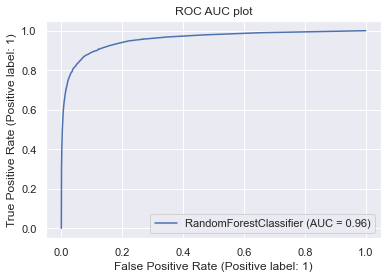

In [32]:
#Plotting the graph which tells us about the area under curve , more the area under curve more will be the better prediction
# model is performing good :
plot_roc_curve(rf,x_test,y_test)
plt.title("ROC AUC plot")
plt.show()

The AUC score of 96% is very good

# Saving the best model

In [33]:
import joblib
joblib.dump(rf,"malig.pkl")

['malig.pkl']

# Feature Weightage

In [34]:
import eli5
eli5.show_weights(rf,vec = tf_vec, top = 15)  #random forest
# will give you top 15 features or words  which makes a comment toxic

Weight,Feature
0.0732 ± 0.0558,fuck
0.0411 ± 0.0433,fucking
0.0299 ± 0.0336,shit
0.0218 ± 0.0196,suck
0.0189 ± 0.0136,stupid
0.0188 ± 0.0114,idiot
0.0175 ± 0.0188,bitch
0.0162 ± 0.0145,asshole
0.0124 ± 0.0133,cunt
0.0114 ± 0.0118,dick


# Test data Predictions

In [35]:
# Vectorizing the test data
test_data = tf_vec.fit_transform(test['comment_text'])
test_data

<153164x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 2831770 stored elements in Compressed Sparse Row format>

In [37]:
# Making prediction of the test data
prediction = rf.predict(test_data)
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [38]:
# Creating a csv file for the predicted data
pd.Series(prediction).to_csv('result_malig.csv')